In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fund_ta = pd.read_excel("Data/sec_fund.xlsx", sheet_name="Tab.2.2")

In [3]:
fund_ta2 = fund_ta.iloc[[5, 11]]
fund_ta3 = fund_ta2.drop('Prevalent Asset Class', axis = 1)
fund_ta4 = fund_ta3.T
col_names = ["Index", "Non-Index"]
fund_ta5 = fund_ta4.iloc[1:]
fund_ta5.reset_index(drop=True)
fund_ta5.columns = col_names
fund_ta5['Total'] = fund_ta5['Index'] + fund_ta5['Non-Index']
fund_ta5['Index_share'] = fund_ta5['Index']/fund_ta5['Total']
fund_ta5['Non-Index_share'] = fund_ta5['Non-Index']/fund_ta5['Total']
fund_ta5

/var/folders/5b/jc4253hj4rl3y0jlxy2y3trm0000gn/T/ipykernel_15364/797822462.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fund_ta5['Total'] = fund_ta5['Index'] + fund_ta5['Non-Index']
/var/folders/5b/jc4253hj4rl3y0jlxy2y3trm0000gn/T/ipykernel_15364/797822462.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fund_ta5['Index_share'] = fund_ta5['Index']/fund_ta5['Total']
/var/folders/5b/jc4253hj4rl3y0jlxy2y3trm0000gn/T/ipykernel_15364/797822462.py:10: SettingWithCopyWarning: 
A value is trying to be set

,Index,Non-Index,Total,Index_share,Non-Index_share
2019-03-01,7744.0,13032.0,20776.0,0.372738,0.627262
2019-04-01,8040.0,13255.0,21295.0,0.377553,0.622447
2019-05-01,7662.0,12761.0,20423.0,0.375165,0.624835
2019-06-01,8134.0,13302.0,21436.0,0.379455,0.620545
2019-07-01,8201.0,13330.0,21531.0,0.380893,0.619107
...,...,...,...,...,...
2024-08-01,15993.0,16288.0,32281.0,0.495431,0.504569
2024-09-01,16349.0,16524.0,32873.0,0.497338,0.502662
2024-10-01,16131.0,16291.0,32422.0,0.497533,0.502467
2024-11-01,17004.0,16810.0,33814.0,0.502869,0.497131


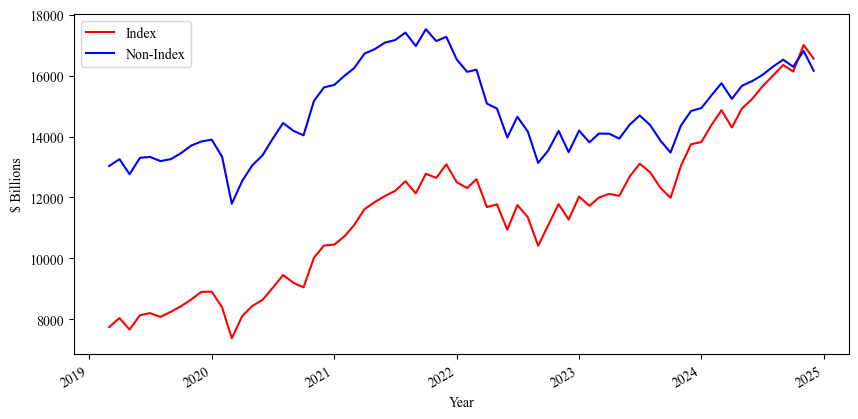

In [4]:
plt.rcParams["font.family"] = "Times New Roman"
fund_ta5[['Index','Non-Index']].plot(figsize=(10, 5), color = ["red", "blue"], linewidth = 1.5)
#plt.title('Fund Total Assets')
plt.ylabel('$ Billions')
plt.xlabel('Year')
plt.grid(False)
plt.savefig("fund_ta.png")
plt.show()

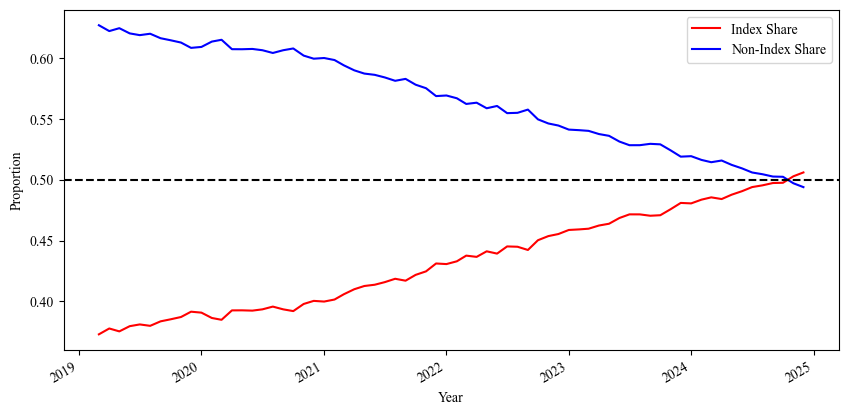

In [5]:
plt.rcParams["font.family"] = "Times New Roman"
fund_ta5[['Index_share','Non-Index_share']].plot(figsize=(10, 5), color = ["red", "blue"], linewidth = 1.5)
#plt.title('Fund Total Assets Shares')
plt.legend(['Index Share', 'Non-Index Share'])
plt.ylabel('Proportion')
plt.xlabel('Year')
plt.axhline(y=0.5, linestyle = '--', color = "black")
plt.grid(False)
plt.savefig("fund_share.png")
plt.show()

In [6]:
f_inftab = pd.read_csv("Data/13f_1/INFOTABLE.tsv", sep='\t')
f_inftab

/var/folders/5b/jc4253hj4rl3y0jlxy2y3trm0000gn/T/ipykernel_15364/579690437.py:1: DtypeWarning: Columns (5,11) have mixed types. Specify dtype option on import or set low_memory=False.
  f_inftab = pd.read_csv("Data/13f_1/INFOTABLE.tsv", sep='\t')


,ACCESSION_NUMBER,INFOTABLE_SK,NAMEOFISSUER,TITLEOFCLASS,CUSIP,FIGI,VALUE,SSHPRNAMT,SSHPRNAMTTYPE,PUTCALL,INVESTMENTDISCRETION,OTHERMANAGER,VOTING_AUTH_SOLE,VOTING_AUTH_SHARED,VOTING_AUTH_NONE
0,0002001900-25-000018,115395377,ALLEGION PLC,ORD SHS,G0176J109,NaN,6364,49,SH,NaN,OTR,11,0,0,49
1,0002001900-25-000018,115395378,ALLEGION PLC,ORD SHS,G0176J109,NaN,7060,54,SH,NaN,OTR,2,0,0,54
2,0002001900-25-000018,115395379,ALLEGION PLC,ORD SHS,G0176J109,NaN,336,3,SH,NaN,OTR,5,0,0,3
3,0002001900-25-000018,115395380,ALLEGION PLC,ORD SHS,G0176J109,NaN,277449,2123,SH,NaN,SOLE,NaN,75,0,2048
4,0002001900-25-000018,115395381,AMERICAN HOMES 4 RENT,CL A,02665T306,NaN,234,6,SH,NaN,OTR,11,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3439997,0002008648-25-000001,111860187,VANGUARD INDEX FDS,EXTEND MKT ETF,922908652,NaN,368205,1938,SH,NaN,SOLE,0,0,0,1938
3439998,0002008648-25-000001,111860188,VANGUARD INTL EQUITY INDEX F,FTSE EMR MKT ETF,922042858,NaN,524074,11900,SH,NaN,SOLE,0,0,0,11900
3439999,0002008648-25-000001,111860189,VANGUARD SCOTTSDALE FDS,MTG-BKD SECS ETF,92206C771,NaN,5263592,116092,SH,NaN,SOLE,0,118,0,115974
3440000,0002008648-25-000001,111860190,VANGUARD SCOTTSDALE FDS,LONG TERM TREAS,92206C847,NaN,2481673,44836,SH,NaN,SOLE,0,113,0,44723


In [7]:
unique_cusip_inftab = f_inftab['CUSIP'].unique().tolist()
with open('unique_cusip_inftab.txt', 'w') as f:
    for i in unique_cusip_inftab:
        f.write(f"{i}\n")

In [8]:
cusip_data = pd.read_csv("Data/CUSIP.csv")
cusip_data

,cusip,symbol,description
0,000225102,AWFDF,A & W FOOD SVCS CDA
1,000303107,AQBN,AAB NATL CO
2,000304105,AACAY,AAC TECHNOLOGIES HLD ADR
3,00032Q104,WHWK,WHITEHAWK THERAPEUTI
4,000360206,AAON,AAON INC
...,...,...,...
64902,P4169Z104,FSRF11:BVMF,FDO INV SETORIAL FL E REF CF
64903,P41945109,FIIMRENT:XLIM,FDO INV MULTIRENTA INMOBILIARIA CF
64904,SAT456787,TST10,TEST DST TEST 10 CL A
64905,Y60780106,74401769:XKRX,MAPSUS INV 9-2 CF


In [9]:
merge_1 = pd.merge(f_inftab, cusip_data, how='inner', left_on='CUSIP', right_on='cusip')
merge_1

,ACCESSION_NUMBER,INFOTABLE_SK,NAMEOFISSUER,TITLEOFCLASS,CUSIP,FIGI,VALUE,SSHPRNAMT,SSHPRNAMTTYPE,PUTCALL,INVESTMENTDISCRETION,OTHERMANAGER,VOTING_AUTH_SOLE,VOTING_AUTH_SHARED,VOTING_AUTH_NONE,cusip,symbol,description
0,0002001900-25-000018,115395377,ALLEGION PLC,ORD SHS,G0176J109,NaN,6364,49,SH,NaN,OTR,11,0,0,49,G0176J109,ALLE,ALLEGION PUB LTD CO
1,0002001900-25-000018,115395378,ALLEGION PLC,ORD SHS,G0176J109,NaN,7060,54,SH,NaN,OTR,2,0,0,54,G0176J109,ALLE,ALLEGION PUB LTD CO
2,0002001900-25-000018,115395379,ALLEGION PLC,ORD SHS,G0176J109,NaN,336,3,SH,NaN,OTR,5,0,0,3,G0176J109,ALLE,ALLEGION PUB LTD CO
3,0002001900-25-000018,115395380,ALLEGION PLC,ORD SHS,G0176J109,NaN,277449,2123,SH,NaN,SOLE,NaN,75,0,2048,G0176J109,ALLE,ALLEGION PUB LTD CO
4,0002001900-25-000014,115391835,ALLEGION PLC,ORD SHS,G0176J109,NaN,6364,49,SH,NaN,OTR,11,0,0,49,G0176J109,ALLE,ALLEGION PUB LTD CO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3339003,0000950123-25-003277,111959684,Pulse Seismic Inc,Common / Ordinary Stock,74586Q109,NaN,50785,29699,SH,NaN,SOLE,NaN,29699,0,0,74586Q109,PLSDF,PULSE SEISMIC INC
3339004,0000950123-25-003277,111959804,Monarch Cement Co/The,Common / Ordinary Stock,609031307,NaN,287760,1308,SH,NaN,SOLE,NaN,1308,0,0,609031307,MCEM,MONARCH CEM CO
3339005,0001315339-25-000002,111957190,FIDELITY,MUTUAL FUNDS -,316138106,NaN,230905,3035,SH,NaN,OTR,NaN,3035,0,0,316138106,FEQIX,FIDELITY EQUITY-INCOME
3339006,0002063074-25-000001,111953665,TRITIUM DCFC LIMITED SHS,Stock,Q9225T207,NaN,0,8,SH,NaN,SOLE,0,8,0,0,Q9225T207,DCFCQ,TRITIUM DCFC LTD


In [10]:
f_cover = pd.read_csv("Data/13f_1/COVERPAGE.tsv", sep='\t')
f_cover

,ACCESSION_NUMBER,REPORTCALENDARORQUARTER,ISAMENDMENT,AMENDMENTNO,AMENDMENTTYPE,CONFDENIEDEXPIRED,DATEDENIEDEXPIRED,DATEREPORTED,REASONFORNONCONFIDENTIALITY,FILINGMANAGER_NAME,...,FILINGMANAGER_STREET2,FILINGMANAGER_CITY,FILINGMANAGER_STATEORCOUNTRY,FILINGMANAGER_ZIPCODE,REPORTTYPE,FORM13FFILENUMBER,CRDNUMBER,SECFILENUMBER,PROVIDEINFOFORINSTRUCTION5,ADDITIONALINFORMATION
0,0002001900-25-000018,31-DEC-2024,Y,4.0,NEW HOLDINGS,NaN,NaN,NaN,NaN,"Modern Wealth Management, LLC",...,NaN,LENEXA,KS,66215,13F HOLDINGS REPORT,028-23804,324624.0,801-127231,Y,Due to a filtering error in the 13F reporting ...
1,0002001900-25-000017,31-DEC-2024,Y,3.0,RESTATEMENT,NaN,NaN,NaN,NaN,"Modern Wealth Management, LLC",...,NaN,LENEXA,KS,66215,13F HOLDINGS REPORT,028-23804,324624.0,801-127231,Y,Due to a filtering error in the 13F reporting ...
2,0000947871-25-000577,31-DEC-2024,Y,1.0,RESTATEMENT,N,NaN,NaN,NaN,DYNAMO INTERNACIONAL GESTAO DE RECURSOS LTDA.,...,NaN,RIO DE JANEIRO,D5,22440-034,13F HOLDINGS REPORT,028-15360,162122.0,802-74725,Y,"This Amendment No. 1 to the Form 13F (the ""Ame..."
3,0000947871-25-000576,30-SEP-2024,Y,1.0,RESTATEMENT,N,NaN,NaN,NaN,DYNAMO INTERNACIONAL GESTAO DE RECURSOS LTDA.,...,NaN,RIO DE JANEIRO,D5,22440-034,13F HOLDINGS REPORT,028-15360,162122.0,802-74725,Y,"This Amendment No. 1 to the Form 13F (the ""Ame..."
4,0000947871-25-000575,30-JUN-2024,Y,1.0,RESTATEMENT,N,NaN,NaN,NaN,DYNAMO INTERNACIONAL GESTAO DE RECURSOS LTDA.,...,NaN,RIO DE JANEIRO,D5,22440-034,13F HOLDINGS REPORT,028-15360,162122.0,802-74725,Y,"This Amendment No. 1 to the Form 13F (the ""Ame..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10760,0001085146-25-001783,31-DEC-2024,Y,1.0,RESTATEMENT,NaN,NaN,NaN,NaN,"American Investment Services, Inc.",...,POST OFFICE BOX 1000,GREAT BARRINGTON,MA,01230-1000,13F HOLDINGS REPORT,028-12178,110043.0,801-14337,N,NaN
10761,0001085146-25-001782,31-DEC-2024,Y,1.0,RESTATEMENT,NaN,NaN,NaN,NaN,SYLEBRA CAPITAL LLC,...,NaN,PALO ALTO,CA,94306,13F HOLDINGS REPORT,028-23475,316856.0,801-123124,N,NaN
10762,0001376474-25-000249,31-DEC-2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Pandi, LLC",...,NaN,Leawood,KS,66211,13F HOLDINGS REPORT,028-25432,330112.0,801-131022,N,NaN
10763,0001364725-25-000002,31-DEC-2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"CIM, LLC",...,NaN,ALBANY,NY,12207,13F HOLDINGS REPORT,028-11985,132136.0,NaN,N,NaN


In [11]:
f_cover['REPORTTYPE'].unique()

array(['13F HOLDINGS REPORT', '13F NOTICE', '13F COMBINATION REPORT'],
      dtype=object)

In [12]:
f_cover[f_cover['REPORTTYPE']=='13F NOTICE']

,ACCESSION_NUMBER,REPORTCALENDARORQUARTER,ISAMENDMENT,AMENDMENTNO,AMENDMENTTYPE,CONFDENIEDEXPIRED,DATEDENIEDEXPIRED,DATEREPORTED,REASONFORNONCONFIDENTIALITY,FILINGMANAGER_NAME,...,FILINGMANAGER_STREET2,FILINGMANAGER_CITY,FILINGMANAGER_STATEORCOUNTRY,FILINGMANAGER_ZIPCODE,REPORTTYPE,FORM13FFILENUMBER,CRDNUMBER,SECFILENUMBER,PROVIDEINFOFORINSTRUCTION5,ADDITIONALINFORMATION
40,0000950123-25-005913,31-MAR-2025,Y,1.0,RESTATEMENT,N,NaN,NaN,NaN,Anson Advisors Inc.,...,Suite 4200,TORONTO,A6,M5J 2T3,13F NOTICE,028-18132,NaN,NaN,N,NaN
87,0001456421-25-000009,31-MAR-2025,N,NaN,NaN,NaN,NaN,NaN,NaN,"Apollo Capital Management, L.P.",...,NaN,New York,NY,10019,13F NOTICE,028-13441,NaN,NaN,N,NaN
103,0002055506-25-000005,31-MAR-2025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Symmetry Investments US LLC,...,"22ND FLOOR, SUITE B",NEW YORK,NY,10022,13F NOTICE,028-25174,317755.0,801-128668,N,NaN
117,0001397424-25-000005,31-MAR-2025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MILLINGTON SECURITIES, LLC",...,SUITE 143,RED BANK,NJ,07701,13F NOTICE,028-16338,147298.0,801-71128,N,NaN
119,0001172661-25-002426,31-MAR-2025,N,NaN,NaN,NaN,NaN,NaN,NaN,DIKER GP LLC,...,27th Floor,New York,NY,10022,13F NOTICE,028-10832,NaN,NaN,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10482,0000796370-25-000008,31-MAR-2025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Acadian Inc,...,NaN,BOSTON,MA,02109,13F NOTICE,028-11931,NaN,NaN,Y,Acadian Inc. is the operating U.S. holding co...
10485,0001547676-25-000002,31-MAR-2025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Swedbank Robur Fonder AB,...,NaN,STOCKHOLM,V7,105 34,13F NOTICE,028-16445,NaN,NaN,N,NaN
10487,0002016827-25-000002,31-MAR-2025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,REX ADVISERS LLC,...,NaN,FAIRFIELD,CT,06824,13F NOTICE,028-24532,32783.0,801-128357,N,NaN
10488,0002037979-25-000002,31-MAR-2025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FRONTEGRA ASSET MANAGEMENT INC.,...,SUITE 600,WESTMONT,IL,60559,13F NOTICE,028-24454,107420.0,801-52123,N,NaN


In [13]:
f_cover[f_cover['REPORTTYPE']=='13F COMBINATION REPORT']

,ACCESSION_NUMBER,REPORTCALENDARORQUARTER,ISAMENDMENT,AMENDMENTNO,AMENDMENTTYPE,CONFDENIEDEXPIRED,DATEDENIEDEXPIRED,DATEREPORTED,REASONFORNONCONFIDENTIALITY,FILINGMANAGER_NAME,...,FILINGMANAGER_STREET2,FILINGMANAGER_CITY,FILINGMANAGER_STATEORCOUNTRY,FILINGMANAGER_ZIPCODE,REPORTTYPE,FORM13FFILENUMBER,CRDNUMBER,SECFILENUMBER,PROVIDEINFOFORINSTRUCTION5,ADDITIONALINFORMATION
75,0000950123-25-005888,31-MAR-2025,N,NaN,NaN,NaN,NaN,NaN,NaN,"EnCap Partners GP, LLC",...,Suite 600,Houston,TX,77024,13F COMBINATION REPORT,028-18569,NaN,NaN,Y,"EnCap Partners GP, LLC (""EnCap Partners GP"") i..."
137,0001135428-25-000021,31-MAR-2025,N,NaN,NaN,NaN,NaN,NaN,NaN,ACADIAN ASSET MANAGEMENT LLC,...,NaN,Boston,MA,02110,13F COMBINATION REPORT,028-05990,NaN,NaN,N,NaN
157,0001954109-25-000005,31-MAR-2025,Y,1.0,RESTATEMENT,NaN,NaN,NaN,NaN,"Strive Asset Management, LLC",...,STE 1100,DALLAS,TX,75201,13F COMBINATION REPORT,028-22677,322039.0,801-125907,N,NaN
216,0001172661-25-002416,31-MAR-2025,N,NaN,NaN,NaN,NaN,NaN,NaN,Alpha DNA Investment Management LLC,...,Suite 301,Columbia,MD,21045,13F COMBINATION REPORT,028-20895,288198.0,801-119457,N,NaN
217,0000950123-25-005812,31-MAR-2025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"UBS AM, A DISTINCT BUSINESS UNIT OF UBS ASSET ...",...,NaN,CHICAGO,IL,60606,13F COMBINATION REPORT,028-02682,NaN,028-02682,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10459,0001601622-25-000003,31-DEC-2024,Y,1.0,NEW HOLDINGS,NaN,NaN,NaN,NaN,"LBJ Family Wealth Advisors, Ltd.",...,SUITE 200,AUSTIN,TX,78756,13F COMBINATION REPORT,028-16100,129701.0,NaN,N,NaN
10460,0001601622-25-000002,31-MAR-2025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"LBJ Family Wealth Advisors, Ltd.",...,SUITE 200,AUSTIN,TX,78756,13F COMBINATION REPORT,028-16100,129701.0,NaN,N,NaN
10489,0000950123-25-003235,30-SEP-2024,Y,1.0,NEW HOLDINGS,N,NaN,NaN,NaN,"SUMITOMO MITSUI FINANCIAL GROUP, INC.",...,CHIYODA-KU,TOKYO,M0,100-0005,13F COMBINATION REPORT,028-17794,NaN,NaN,Y,Our subsidiary Sumitomo Mitsui Banking Corpora...
10613,0001941040-25-000176,31-DEC-2024,N,NaN,NaN,NaN,NaN,NaN,NaN,"SILVER OAK WEALTH ADVISORS SERVICES, LLC",...,NaN,LOS ANGELES,CA,90024,13F COMBINATION REPORT,028-25456,291645.0,801-112279,N,NaN


In [14]:
f_cover['AMENDMENTTYPE'].unique()

array(['NEW HOLDINGS', 'RESTATEMENT', nan], dtype=object)

In [15]:
manager_name = f_cover['FILINGMANAGER_NAME'].unique().tolist()
with open('manager_name.txt', 'w') as f:
    for i in manager_name:
        f.write(f"{i}\n")

In [16]:
merge_2 = pd.merge(merge_1, f_cover, how = 'inner', left_on = 'ACCESSION_NUMBER', right_on = 'ACCESSION_NUMBER')


In [17]:
print(merge_2.columns)

Index(['ACCESSION_NUMBER', 'INFOTABLE_SK', 'NAMEOFISSUER', 'TITLEOFCLASS',
       'CUSIP', 'FIGI', 'VALUE', 'SSHPRNAMT', 'SSHPRNAMTTYPE', 'PUTCALL',
       'INVESTMENTDISCRETION', 'OTHERMANAGER', 'VOTING_AUTH_SOLE',
       'VOTING_AUTH_SHARED', 'VOTING_AUTH_NONE', 'cusip', 'symbol',
       'description', 'REPORTCALENDARORQUARTER', 'ISAMENDMENT', 'AMENDMENTNO',
       'AMENDMENTTYPE', 'CONFDENIEDEXPIRED', 'DATEDENIEDEXPIRED',
       'DATEREPORTED', 'REASONFORNONCONFIDENTIALITY', 'FILINGMANAGER_NAME',
       'FILINGMANAGER_STREET1', 'FILINGMANAGER_STREET2', 'FILINGMANAGER_CITY',
       'FILINGMANAGER_STATEORCOUNTRY', 'FILINGMANAGER_ZIPCODE', 'REPORTTYPE',
       'FORM13FFILENUMBER', 'CRDNUMBER', 'SECFILENUMBER',
       'PROVIDEINFOFORINSTRUCTION5', 'ADDITIONALINFORMATION'],
      dtype='object')


In [18]:
merge_2['REPORTTYPE'].unique()

array(['13F HOLDINGS REPORT', '13F COMBINATION REPORT'], dtype=object)

In [19]:
unique_add_info = merge_2['ADDITIONALINFORMATION'].unique()
with open('unique_add_info.txt', 'w') as f:
    for i in unique_add_info:
        f.write(f"{i}\n")

In [20]:
merge_3 = merge_2[['REPORTCALENDARORQUARTER','symbol', 'description', 'CUSIP', 'SSHPRNAMT', 'ACCESSION_NUMBER', 'VALUE', 'FILINGMANAGER_NAME', 'REPORTTYPE', 'AMENDMENTTYPE', 'AMENDMENTNO']]
merge_4 = merge_3.sort_values(by=['symbol', 'FILINGMANAGER_NAME']).reset_index(drop=True)
merge_4

,REPORTCALENDARORQUARTER,symbol,description,CUSIP,SSHPRNAMT,ACCESSION_NUMBER,VALUE,FILINGMANAGER_NAME,REPORTTYPE,AMENDMENTTYPE,AMENDMENTNO
0,31-MAR-2025,A,AGILENT TECHNOLOGIES,00846U101,193,0001415889-25-010784,22577,"CALDWELL SUTTER CAPITAL, INC.",13F HOLDINGS REPORT,NaN,NaN
1,31-MAR-2025,A,AGILENT TECHNOLOGIES,00846U101,96494,0001415889-25-012711,11269564,NEUBERGER BERMAN GROUP LLC,13F HOLDINGS REPORT,NaN,NaN
2,31-MAR-2025,A,AGILENT TECHNOLOGIES,00846U101,4263,0001415889-25-012711,497992,NEUBERGER BERMAN GROUP LLC,13F HOLDINGS REPORT,NaN,NaN
3,31-MAR-2025,A,AGILENT TECHNOLOGIES,00846U101,9652,0001214659-25-007673,1126940,&PARTNERS,13F HOLDINGS REPORT,NaN,NaN
4,31-DEC-2024,A,AGILENT TECHNOLOGIES,00846U101,4976,0002060412-25-000001,668476,111 Capital,13F HOLDINGS REPORT,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3339003,31-MAR-2025,NaN,NANO LABS LTD A,G6391Y128,0,0000752798-25-000010,0,"CONCOURSE FINANCIAL GROUP SECURITIES, INC.",13F HOLDINGS REPORT,NaN,NaN
3339004,31-MAR-2025,NaN,NANO LABS LTD A,G6391Y128,2000,0000926171-25-000005,8600,NATIONAL BANK OF CANADA /FI/,13F HOLDINGS REPORT,NaN,NaN
3339005,31-MAR-2025,NaN,NANO LABS LTD A,G6391Y128,118,0001488542-25-000007,0,"SIMPLEX TRADING, LLC",13F HOLDINGS REPORT,NaN,NaN
3339006,31-MAR-2025,NaN,NANO LABS LTD A,G6391Y128,4,0000950123-25-004922,18,UBS Group AG,13F COMBINATION REPORT,NaN,NaN


In [21]:
merge_4['AMENDMENTTYPE'].unique()

array([nan, 'RESTATEMENT', 'NEW HOLDINGS'], dtype=object)

In [22]:
b = merge_4[merge_4['AMENDMENTTYPE'] == 'NEW HOLDINGS'].sort_values(by=['REPORTCALENDARORQUARTER', 'symbol', 'FILINGMANAGER_NAME']).reset_index(drop=True)
b

,REPORTCALENDARORQUARTER,symbol,description,CUSIP,SSHPRNAMT,ACCESSION_NUMBER,VALUE,FILINGMANAGER_NAME,REPORTTYPE,AMENDMENTTYPE,AMENDMENTNO
0,30-JUN-2019,SPY,SPDR S&P 500 ETF,78462F103,4580,0001587301-25-000018,1342000,Miramar Fiduciary Corp,13F HOLDINGS REPORT,NEW HOLDINGS,2.0
1,30-JUN-2019,SSP,SCRIPPS E W CO OHIO A,811054402,845618,0001587301-25-000018,12929499,Miramar Fiduciary Corp,13F HOLDINGS REPORT,NEW HOLDINGS,2.0
2,30-JUN-2019,VNQ,VANGUARD REAL ESTATE ETF,922908553,1513,0001587301-25-000018,132000,Miramar Fiduciary Corp,13F HOLDINGS REPORT,NEW HOLDINGS,2.0
3,30-JUN-2019,VTI,VANGUARD TOTAL STOCK MARKET ETF,922908769,28710,0001587301-25-000018,4309000,Miramar Fiduciary Corp,13F HOLDINGS REPORT,NEW HOLDINGS,2.0
4,30-JUN-2021,SPY,SPDR S&P 500 ETF,78462F103,4580,0001587301-25-000010,1960000,Miramar Fiduciary Corp,13F HOLDINGS REPORT,NEW HOLDINGS,1.0
...,...,...,...,...,...,...,...,...,...,...,...
16526,31-MAR-2025,ZTS,ZOETIS INC A,98978V103,19483,0001367653-25-000006,3207834,"Huntleigh Advisors, Inc.",13F HOLDINGS REPORT,NEW HOLDINGS,1.0
16527,31-MAR-2025,ZTS,ZOETIS INC A,98978V103,7647,0001962449-25-000003,1259079,"Kestra Investment Management, LLC",13F HOLDINGS REPORT,NEW HOLDINGS,1.0
16528,31-MAR-2025,ZTS,ZOETIS INC A,98978V103,151,0001376474-25-000502,24862,"Nova Wealth Management, Inc.",13F HOLDINGS REPORT,NEW HOLDINGS,1.0
16529,31-MAR-2025,ZTS,ZOETIS INC A,98978V103,72720,0001580642-25-003122,11973339,"Orion Portfolio Solutions, LLC",13F COMBINATION REPORT,NEW HOLDINGS,1.0


In [23]:
b[b.duplicated(subset=['REPORTCALENDARORQUARTER', 'symbol', 'FILINGMANAGER_NAME'], keep=False)]

,REPORTCALENDARORQUARTER,symbol,description,CUSIP,SSHPRNAMT,ACCESSION_NUMBER,VALUE,FILINGMANAGER_NAME,REPORTTYPE,AMENDMENTTYPE,AMENDMENTNO
8,30-JUN-2024,AAPL,APPLE INC,037833100,680000,0001974312-25-000005,143221600,"TORNO CAPITAL, LLC",13F HOLDINGS REPORT,NEW HOLDINGS,1.0
9,30-JUN-2024,AAPL,APPLE INC,037833100,680000,0001974312-25-000005,143221600,"TORNO CAPITAL, LLC",13F HOLDINGS REPORT,NEW HOLDINGS,1.0
13,30-JUN-2024,AMBA,AMBARELLA INC,G037AX101,50000,0001974312-25-000005,2697500,"TORNO CAPITAL, LLC",13F HOLDINGS REPORT,NEW HOLDINGS,1.0
14,30-JUN-2024,AMBA,AMBARELLA INC,G037AX101,15000,0001974312-25-000005,809250,"TORNO CAPITAL, LLC",13F HOLDINGS REPORT,NEW HOLDINGS,1.0
15,30-JUN-2024,AMD,ADVANCED MICRO DEVIC,007903107,250000,0001974312-25-000005,40552500,"TORNO CAPITAL, LLC",13F HOLDINGS REPORT,NEW HOLDINGS,1.0
...,...,...,...,...,...,...,...,...,...,...,...
9150,31-MAR-2024,WDAY,WORKDAY INC A,98138H101,790,0002001900-25-000008,215473,"Modern Wealth Management, LLC",13F HOLDINGS REPORT,NEW HOLDINGS,2.0
9183,31-MAR-2024,WRB,BERKLEY W R CORP,084423102,839892,0000070858-25-000166,74280048,BANK OF AMERICA CORP /DE/,13F HOLDINGS REPORT,NEW HOLDINGS,1.0
9184,31-MAR-2024,WRB,BERKLEY W R CORP,084423102,203006,0000070858-25-000166,17953851,BANK OF AMERICA CORP /DE/,13F HOLDINGS REPORT,NEW HOLDINGS,1.0
13636,31-MAR-2025,MRVL,MARVELL TECHNOLOGY I,573874104,50285,0001367653-25-000006,3096007,"Huntleigh Advisors, Inc.",13F HOLDINGS REPORT,NEW HOLDINGS,1.0


In [24]:
merge_4[(merge_4['description'] == 'APPLE INC') & (merge_4['FILINGMANAGER_NAME'] == 'CLEAR STREET LLC') & (merge_4['REPORTCALENDARORQUARTER'] == '31-MAR-2024')]

,REPORTCALENDARORQUARTER,symbol,description,CUSIP,SSHPRNAMT,ACCESSION_NUMBER,VALUE,FILINGMANAGER_NAME,REPORTTYPE,AMENDMENTTYPE,AMENDMENTNO
8163,31-MAR-2024,AAPL,APPLE INC,037833100,2090000,0001708828-25-000015,358393200,CLEAR STREET LLC,13F HOLDINGS REPORT,RESTATEMENT,5.0
8164,31-MAR-2024,AAPL,APPLE INC,037833100,1000000,0001708828-25-000015,171480000,CLEAR STREET LLC,13F HOLDINGS REPORT,RESTATEMENT,5.0
8165,31-MAR-2024,AAPL,APPLE INC,037833100,3090000,0001708828-25-000015,529873200,CLEAR STREET LLC,13F HOLDINGS REPORT,RESTATEMENT,5.0


In [25]:
a = merge_4[merge_4.duplicated(subset=['REPORTCALENDARORQUARTER', 'description', 'FILINGMANAGER_NAME'], keep=False)]
a

,REPORTCALENDARORQUARTER,symbol,description,CUSIP,SSHPRNAMT,ACCESSION_NUMBER,VALUE,FILINGMANAGER_NAME,REPORTTYPE,AMENDMENTTYPE,AMENDMENTNO
1,31-MAR-2025,A,AGILENT TECHNOLOGIES,00846U101,96494,0001415889-25-012711,11269564,NEUBERGER BERMAN GROUP LLC,13F HOLDINGS REPORT,NaN,NaN
2,31-MAR-2025,A,AGILENT TECHNOLOGIES,00846U101,4263,0001415889-25-012711,497992,NEUBERGER BERMAN GROUP LLC,13F HOLDINGS REPORT,NaN,NaN
10,31-MAR-2025,A,AGILENT TECHNOLOGIES,00846U101,724,0001697723-25-000003,84694,AE Wealth Management LLC,13F COMBINATION REPORT,NaN,NaN
11,31-MAR-2025,A,AGILENT TECHNOLOGIES,00846U101,21,0001697723-25-000003,2483,AE Wealth Management LLC,13F COMBINATION REPORT,NaN,NaN
12,31-MAR-2025,A,AGILENT TECHNOLOGIES,00846U101,732,0001697723-25-000003,85629,AE Wealth Management LLC,13F COMBINATION REPORT,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3338995,31-MAR-2025,ZYXI,ZYNEX INC,98986M103,2000,0000072971-25-000149,4400,WELLS FARGO & COMPANY/MN,13F HOLDINGS REPORT,NaN,NaN
3338996,31-MAR-2025,ZYXI,ZYNEX INC,98986M103,7296,0000072971-25-000149,16051,WELLS FARGO & COMPANY/MN,13F HOLDINGS REPORT,NaN,NaN
3338997,31-MAR-2025,ZYXI,ZYNEX INC,98986M103,1495,0000072971-25-000149,3289,WELLS FARGO & COMPANY/MN,13F HOLDINGS REPORT,NaN,NaN
3339006,31-MAR-2025,NaN,NANO LABS LTD A,G6391Y128,4,0000950123-25-004922,18,UBS Group AG,13F COMBINATION REPORT,NaN,NaN


In [26]:
a[a['AMENDMENTNO'] == 5]

,REPORTCALENDARORQUARTER,symbol,description,CUSIP,SSHPRNAMT,ACCESSION_NUMBER,VALUE,FILINGMANAGER_NAME,REPORTTYPE,AMENDMENTTYPE,AMENDMENTNO
8163,31-MAR-2024,AAPL,APPLE INC,037833100,2090000,0001708828-25-000015,358393200,CLEAR STREET LLC,13F HOLDINGS REPORT,RESTATEMENT,5.0
8164,31-MAR-2024,AAPL,APPLE INC,037833100,1000000,0001708828-25-000015,171480000,CLEAR STREET LLC,13F HOLDINGS REPORT,RESTATEMENT,5.0
8165,31-MAR-2024,AAPL,APPLE INC,037833100,3090000,0001708828-25-000015,529873200,CLEAR STREET LLC,13F HOLDINGS REPORT,RESTATEMENT,5.0
147979,31-MAR-2024,AMD,ADVANCED MICRO DEVIC,007903107,450000,0001708828-25-000015,81220500,CLEAR STREET LLC,13F HOLDINGS REPORT,RESTATEMENT,5.0
147980,31-MAR-2024,AMD,ADVANCED MICRO DEVIC,007903107,450000,0001708828-25-000015,81220500,CLEAR STREET LLC,13F HOLDINGS REPORT,RESTATEMENT,5.0
175795,31-MAR-2024,AMZN,AMAZON.COM INC,023135106,2025000,0001708828-25-000015,365269500,CLEAR STREET LLC,13F HOLDINGS REPORT,RESTATEMENT,5.0
175796,31-MAR-2024,AMZN,AMAZON.COM INC,023135106,2025000,0001708828-25-000015,365269500,CLEAR STREET LLC,13F HOLDINGS REPORT,RESTATEMENT,5.0
430735,31-MAR-2024,BRK/B,BERKSHIRE HATHAWAY B,084670702,230000,0001708828-25-000015,96719600,CLEAR STREET LLC,13F HOLDINGS REPORT,RESTATEMENT,5.0
430736,31-MAR-2024,BRK/B,BERKSHIRE HATHAWAY B,084670702,230000,0001708828-25-000015,96719600,CLEAR STREET LLC,13F HOLDINGS REPORT,RESTATEMENT,5.0
843335,31-MAR-2024,DJT,TRUMP MEDIA & TECHNO,25400Q105,30300,0001708828-25-000015,1877388,CLEAR STREET LLC,13F HOLDINGS REPORT,RESTATEMENT,5.0


In [27]:
a[a['AMENDMENTTYPE'].isna()] #Should I take max?

,REPORTCALENDARORQUARTER,symbol,description,CUSIP,SSHPRNAMT,ACCESSION_NUMBER,VALUE,FILINGMANAGER_NAME,REPORTTYPE,AMENDMENTTYPE,AMENDMENTNO
1,31-MAR-2025,A,AGILENT TECHNOLOGIES,00846U101,96494,0001415889-25-012711,11269564,NEUBERGER BERMAN GROUP LLC,13F HOLDINGS REPORT,NaN,NaN
2,31-MAR-2025,A,AGILENT TECHNOLOGIES,00846U101,4263,0001415889-25-012711,497992,NEUBERGER BERMAN GROUP LLC,13F HOLDINGS REPORT,NaN,NaN
10,31-MAR-2025,A,AGILENT TECHNOLOGIES,00846U101,724,0001697723-25-000003,84694,AE Wealth Management LLC,13F COMBINATION REPORT,NaN,NaN
11,31-MAR-2025,A,AGILENT TECHNOLOGIES,00846U101,21,0001697723-25-000003,2483,AE Wealth Management LLC,13F COMBINATION REPORT,NaN,NaN
12,31-MAR-2025,A,AGILENT TECHNOLOGIES,00846U101,732,0001697723-25-000003,85629,AE Wealth Management LLC,13F COMBINATION REPORT,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3338995,31-MAR-2025,ZYXI,ZYNEX INC,98986M103,2000,0000072971-25-000149,4400,WELLS FARGO & COMPANY/MN,13F HOLDINGS REPORT,NaN,NaN
3338996,31-MAR-2025,ZYXI,ZYNEX INC,98986M103,7296,0000072971-25-000149,16051,WELLS FARGO & COMPANY/MN,13F HOLDINGS REPORT,NaN,NaN
3338997,31-MAR-2025,ZYXI,ZYNEX INC,98986M103,1495,0000072971-25-000149,3289,WELLS FARGO & COMPANY/MN,13F HOLDINGS REPORT,NaN,NaN
3339006,31-MAR-2025,NaN,NANO LABS LTD A,G6391Y128,4,0000950123-25-004922,18,UBS Group AG,13F COMBINATION REPORT,NaN,NaN


In [28]:
a[a['AMENDMENTTYPE'] == 'RESTATEMENT']

,REPORTCALENDARORQUARTER,symbol,description,CUSIP,SSHPRNAMT,ACCESSION_NUMBER,VALUE,FILINGMANAGER_NAME,REPORTTYPE,AMENDMENTTYPE,AMENDMENTNO
310,31-MAR-2025,A,AGILENT TECHNOLOGIES,00846U101,3592,0001172661-25-002159,420192,"CALTON & ASSOCIATES, INC.",13F HOLDINGS REPORT,RESTATEMENT,1.0
589,31-MAR-2025,A,AGILENT TECHNOLOGIES,00846U101,19,0002036117-25-000003,2223,"FLAGSHIP WEALTH ADVISORS, LLC",13F HOLDINGS REPORT,RESTATEMENT,1.0
639,31-MAR-2025,A,AGILENT TECHNOLOGIES,00846U101,97617,0001085146-25-003391,11419153,Focus Partners Wealth,13F HOLDINGS REPORT,RESTATEMENT,1.0
640,31-DEC-2024,A,AGILENT TECHNOLOGIES,00846U101,101225,0001085146-25-003390,13732059,Focus Partners Wealth,13F HOLDINGS REPORT,RESTATEMENT,1.0
642,31-MAR-2025,A,AGILENT TECHNOLOGIES,00846U101,234515,0001172661-25-002428,21253974,Foresight Group Ltd Liability Partnership,13F HOLDINGS REPORT,RESTATEMENT,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3338951,30-JUN-2024,ZYXI,ZYNEX INC,98986M103,154,0000895421-25-000378,1435,MORGAN STANLEY,13F COMBINATION REPORT,RESTATEMENT,2.0
3338956,31-MAR-2025,ZYXI,ZYNEX INC,98986M103,11215,0001566493-25-000003,24673,"Newman Dignan & Sheerar, Inc.",13F HOLDINGS REPORT,RESTATEMENT,1.0
3338967,31-MAR-2025,ZYXI,ZYNEX INC,98986M103,23382,0001115418-25-000005,51435,RHUMBLINE ADVISERS,13F HOLDINGS REPORT,RESTATEMENT,1.0
3338993,31-DEC-2024,ZYXI,ZYNEX INC,98986M103,330,0001068837-25-000023,2643,Voya Investment Management LLC,13F HOLDINGS REPORT,RESTATEMENT,1.0


In [29]:
c = a[a.duplicated(subset=['REPORTCALENDARORQUARTER', 'description', 'FILINGMANAGER_NAME', 'AMENDMENTTYPE', 'AMENDMENTNO'], keep=False)]
c

,REPORTCALENDARORQUARTER,symbol,description,CUSIP,SSHPRNAMT,ACCESSION_NUMBER,VALUE,FILINGMANAGER_NAME,REPORTTYPE,AMENDMENTTYPE,AMENDMENTNO
1,31-MAR-2025,A,AGILENT TECHNOLOGIES,00846U101,96494,0001415889-25-012711,11269564,NEUBERGER BERMAN GROUP LLC,13F HOLDINGS REPORT,NaN,NaN
2,31-MAR-2025,A,AGILENT TECHNOLOGIES,00846U101,4263,0001415889-25-012711,497992,NEUBERGER BERMAN GROUP LLC,13F HOLDINGS REPORT,NaN,NaN
10,31-MAR-2025,A,AGILENT TECHNOLOGIES,00846U101,724,0001697723-25-000003,84694,AE Wealth Management LLC,13F COMBINATION REPORT,NaN,NaN
11,31-MAR-2025,A,AGILENT TECHNOLOGIES,00846U101,21,0001697723-25-000003,2483,AE Wealth Management LLC,13F COMBINATION REPORT,NaN,NaN
12,31-MAR-2025,A,AGILENT TECHNOLOGIES,00846U101,732,0001697723-25-000003,85629,AE Wealth Management LLC,13F COMBINATION REPORT,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3338995,31-MAR-2025,ZYXI,ZYNEX INC,98986M103,2000,0000072971-25-000149,4400,WELLS FARGO & COMPANY/MN,13F HOLDINGS REPORT,NaN,NaN
3338996,31-MAR-2025,ZYXI,ZYNEX INC,98986M103,7296,0000072971-25-000149,16051,WELLS FARGO & COMPANY/MN,13F HOLDINGS REPORT,NaN,NaN
3338997,31-MAR-2025,ZYXI,ZYNEX INC,98986M103,1495,0000072971-25-000149,3289,WELLS FARGO & COMPANY/MN,13F HOLDINGS REPORT,NaN,NaN
3339006,31-MAR-2025,NaN,NANO LABS LTD A,G6391Y128,4,0000950123-25-004922,18,UBS Group AG,13F COMBINATION REPORT,NaN,NaN


In [30]:
c[c['AMENDMENTTYPE'] == 'NEW HOLDINGS'] #Should I take max and add or add all new holdings?

,REPORTCALENDARORQUARTER,symbol,description,CUSIP,SSHPRNAMT,ACCESSION_NUMBER,VALUE,FILINGMANAGER_NAME,REPORTTYPE,AMENDMENTTYPE,AMENDMENTNO
1852,30-SEP-2024,AA,ALCOA CORP,013872106,383280,0000070858-25-000167,14786942,BANK OF AMERICA CORP /DE/,13F HOLDINGS REPORT,NEW HOLDINGS,1.0
1853,30-SEP-2024,AA,ALCOA CORP,013872106,22639,0000070858-25-000167,873413,BANK OF AMERICA CORP /DE/,13F HOLDINGS REPORT,NEW HOLDINGS,1.0
1854,31-MAR-2024,AA,ALCOA CORP,013872106,492580,0000070858-25-000166,16644278,BANK OF AMERICA CORP /DE/,13F HOLDINGS REPORT,NEW HOLDINGS,1.0
1855,31-MAR-2024,AA,ALCOA CORP,013872106,20196,0000070858-25-000166,682423,BANK OF AMERICA CORP /DE/,13F HOLDINGS REPORT,NEW HOLDINGS,1.0
5043,30-SEP-2024,AAON,AAON INC,000360206,83975,0000070858-25-000167,9055864,BANK OF AMERICA CORP /DE/,13F HOLDINGS REPORT,NEW HOLDINGS,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3298158,30-JUN-2024,XOM,EXXON MOBIL CORP,30231G102,16000,0001974312-25-000005,1841920,"TORNO CAPITAL, LLC",13F HOLDINGS REPORT,NEW HOLDINGS,1.0
3298159,31-DEC-2024,XOM,EXXON MOBIL CORP,30231G102,200,0001974312-25-000007,21514,"TORNO CAPITAL, LLC",13F HOLDINGS REPORT,NEW HOLDINGS,1.0
3298160,31-DEC-2024,XOM,EXXON MOBIL CORP,30231G102,200,0001974312-25-000007,21514,"TORNO CAPITAL, LLC",13F HOLDINGS REPORT,NEW HOLDINGS,1.0
3325884,30-SEP-2024,ZETA,ZETA GLOBAL HLDGS CO A,98956A105,150000,0001974312-25-000006,4474500,"TORNO CAPITAL, LLC",13F HOLDINGS REPORT,NEW HOLDINGS,1.0


In [31]:
c[c['AMENDMENTTYPE'] == 'RESTATEMENT'] #Should I take max if Ammend no is the same?

,REPORTCALENDARORQUARTER,symbol,description,CUSIP,SSHPRNAMT,ACCESSION_NUMBER,VALUE,FILINGMANAGER_NAME,REPORTTYPE,AMENDMENTTYPE,AMENDMENTNO
668,31-MAR-2025,A,AGILENT TECHNOLOGIES,00846U101,181464,0000769993-25-000301,21227659,GOLDMAN SACHS GROUP INC,13F HOLDINGS REPORT,RESTATEMENT,1.0
669,31-MAR-2025,A,AGILENT TECHNOLOGIES,00846U101,1176314,0000769993-25-000301,137605185,GOLDMAN SACHS GROUP INC,13F HOLDINGS REPORT,RESTATEMENT,1.0
670,31-MAR-2025,A,AGILENT TECHNOLOGIES,00846U101,43850,0000769993-25-000301,5129564,GOLDMAN SACHS GROUP INC,13F HOLDINGS REPORT,RESTATEMENT,1.0
671,31-MAR-2025,A,AGILENT TECHNOLOGIES,00846U101,21999,0000769993-25-000301,2573443,GOLDMAN SACHS GROUP INC,13F HOLDINGS REPORT,RESTATEMENT,1.0
817,31-MAR-2025,A,AGILENT TECHNOLOGIES,00846U101,82737,0001595888-25-000100,9678574,"JANE STREET GROUP, LLC",13F HOLDINGS REPORT,RESTATEMENT,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3338949,30-JUN-2024,ZYXI,ZYNEX INC,98986M103,1125,0000895421-25-000378,10485,MORGAN STANLEY,13F COMBINATION REPORT,RESTATEMENT,2.0
3338950,30-JUN-2024,ZYXI,ZYNEX INC,98986M103,1176,0000895421-25-000378,10960,MORGAN STANLEY,13F COMBINATION REPORT,RESTATEMENT,2.0
3338951,30-JUN-2024,ZYXI,ZYNEX INC,98986M103,154,0000895421-25-000378,1435,MORGAN STANLEY,13F COMBINATION REPORT,RESTATEMENT,2.0
3338993,31-DEC-2024,ZYXI,ZYNEX INC,98986M103,330,0001068837-25-000023,2643,Voya Investment Management LLC,13F HOLDINGS REPORT,RESTATEMENT,1.0


In [32]:
merge_4[merge_4['AMENDMENTTYPE'] == 'RESTATEMENT']

,REPORTCALENDARORQUARTER,symbol,description,CUSIP,SSHPRNAMT,ACCESSION_NUMBER,VALUE,FILINGMANAGER_NAME,REPORTTYPE,AMENDMENTTYPE,AMENDMENTNO
104,31-MAR-2025,A,AGILENT TECHNOLOGIES,00846U101,3049,0001085146-25-003385,356682,"Advisory Alpha, LLC",13F HOLDINGS REPORT,RESTATEMENT,1.0
220,31-DEC-2024,A,AGILENT TECHNOLOGIES,00846U101,4663,0001085146-25-001793,626411,BRIGHTON JONES LLC,13F HOLDINGS REPORT,RESTATEMENT,1.0
221,30-SEP-2024,A,AGILENT TECHNOLOGIES,00846U101,4393,0001085146-25-001792,652250,BRIGHTON JONES LLC,13F HOLDINGS REPORT,RESTATEMENT,1.0
222,30-JUN-2024,A,AGILENT TECHNOLOGIES,00846U101,4468,0001085146-25-001791,579229,BRIGHTON JONES LLC,13F HOLDINGS REPORT,RESTATEMENT,1.0
307,30-JUN-2024,A,AGILENT TECHNOLOGIES,00846U101,484552,0001081019-25-000011,62812476,CALIFORNIA STATE TEACHERS RETIREMENT SYSTEM,13F HOLDINGS REPORT,RESTATEMENT,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3338956,31-MAR-2025,ZYXI,ZYNEX INC,98986M103,11215,0001566493-25-000003,24673,"Newman Dignan & Sheerar, Inc.",13F HOLDINGS REPORT,RESTATEMENT,1.0
3338966,31-DEC-2024,ZYXI,ZYNEX INC,98986M103,22011,0001115418-25-000006,176299,RHUMBLINE ADVISERS,13F HOLDINGS REPORT,RESTATEMENT,1.0
3338967,31-MAR-2025,ZYXI,ZYNEX INC,98986M103,23382,0001115418-25-000005,51435,RHUMBLINE ADVISERS,13F HOLDINGS REPORT,RESTATEMENT,1.0
3338993,31-DEC-2024,ZYXI,ZYNEX INC,98986M103,330,0001068837-25-000023,2643,Voya Investment Management LLC,13F HOLDINGS REPORT,RESTATEMENT,1.0


In [33]:
merge_4[merge_4['AMENDMENTTYPE'].isna()]

,REPORTCALENDARORQUARTER,symbol,description,CUSIP,SSHPRNAMT,ACCESSION_NUMBER,VALUE,FILINGMANAGER_NAME,REPORTTYPE,AMENDMENTTYPE,AMENDMENTNO
0,31-MAR-2025,A,AGILENT TECHNOLOGIES,00846U101,193,0001415889-25-010784,22577,"CALDWELL SUTTER CAPITAL, INC.",13F HOLDINGS REPORT,NaN,NaN
1,31-MAR-2025,A,AGILENT TECHNOLOGIES,00846U101,96494,0001415889-25-012711,11269564,NEUBERGER BERMAN GROUP LLC,13F HOLDINGS REPORT,NaN,NaN
2,31-MAR-2025,A,AGILENT TECHNOLOGIES,00846U101,4263,0001415889-25-012711,497992,NEUBERGER BERMAN GROUP LLC,13F HOLDINGS REPORT,NaN,NaN
3,31-MAR-2025,A,AGILENT TECHNOLOGIES,00846U101,9652,0001214659-25-007673,1126940,&PARTNERS,13F HOLDINGS REPORT,NaN,NaN
4,31-DEC-2024,A,AGILENT TECHNOLOGIES,00846U101,4976,0002060412-25-000001,668476,111 Capital,13F HOLDINGS REPORT,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3339003,31-MAR-2025,NaN,NANO LABS LTD A,G6391Y128,0,0000752798-25-000010,0,"CONCOURSE FINANCIAL GROUP SECURITIES, INC.",13F HOLDINGS REPORT,NaN,NaN
3339004,31-MAR-2025,NaN,NANO LABS LTD A,G6391Y128,2000,0000926171-25-000005,8600,NATIONAL BANK OF CANADA /FI/,13F HOLDINGS REPORT,NaN,NaN
3339005,31-MAR-2025,NaN,NANO LABS LTD A,G6391Y128,118,0001488542-25-000007,0,"SIMPLEX TRADING, LLC",13F HOLDINGS REPORT,NaN,NaN
3339006,31-MAR-2025,NaN,NANO LABS LTD A,G6391Y128,4,0000950123-25-004922,18,UBS Group AG,13F COMBINATION REPORT,NaN,NaN


In [34]:
merge_4[merge_4['AMENDMENTNO'].isna()]

,REPORTCALENDARORQUARTER,symbol,description,CUSIP,SSHPRNAMT,ACCESSION_NUMBER,VALUE,FILINGMANAGER_NAME,REPORTTYPE,AMENDMENTTYPE,AMENDMENTNO
0,31-MAR-2025,A,AGILENT TECHNOLOGIES,00846U101,193,0001415889-25-010784,22577,"CALDWELL SUTTER CAPITAL, INC.",13F HOLDINGS REPORT,NaN,NaN
1,31-MAR-2025,A,AGILENT TECHNOLOGIES,00846U101,96494,0001415889-25-012711,11269564,NEUBERGER BERMAN GROUP LLC,13F HOLDINGS REPORT,NaN,NaN
2,31-MAR-2025,A,AGILENT TECHNOLOGIES,00846U101,4263,0001415889-25-012711,497992,NEUBERGER BERMAN GROUP LLC,13F HOLDINGS REPORT,NaN,NaN
3,31-MAR-2025,A,AGILENT TECHNOLOGIES,00846U101,9652,0001214659-25-007673,1126940,&PARTNERS,13F HOLDINGS REPORT,NaN,NaN
4,31-DEC-2024,A,AGILENT TECHNOLOGIES,00846U101,4976,0002060412-25-000001,668476,111 Capital,13F HOLDINGS REPORT,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3339003,31-MAR-2025,NaN,NANO LABS LTD A,G6391Y128,0,0000752798-25-000010,0,"CONCOURSE FINANCIAL GROUP SECURITIES, INC.",13F HOLDINGS REPORT,NaN,NaN
3339004,31-MAR-2025,NaN,NANO LABS LTD A,G6391Y128,2000,0000926171-25-000005,8600,NATIONAL BANK OF CANADA /FI/,13F HOLDINGS REPORT,NaN,NaN
3339005,31-MAR-2025,NaN,NANO LABS LTD A,G6391Y128,118,0001488542-25-000007,0,"SIMPLEX TRADING, LLC",13F HOLDINGS REPORT,NaN,NaN
3339006,31-MAR-2025,NaN,NANO LABS LTD A,G6391Y128,4,0000950123-25-004922,18,UBS Group AG,13F COMBINATION REPORT,NaN,NaN


In [35]:
merge_4['REPORTCALENDARORQUARTER'].unique()

array(['31-MAR-2025', '31-DEC-2024', '30-SEP-2024', '30-JUN-2024',
       '31-MAR-2017', '31-DEC-2016', '30-JUN-2017', '30-SEP-2017',
       '30-JUN-2016', '30-SEP-2016', '30-SEP-2022', '31-DEC-2022',
       '31-MAR-2023', '30-JUN-2022', '31-DEC-2020', '30-SEP-2020',
       '30-JUN-2020', '31-DEC-2021', '31-MAR-2022', '30-SEP-2021',
       '31-MAR-2021', '30-JUN-2021', '30-SEP-2019', '31-DEC-2019',
       '31-MAR-2020', '31-DEC-2015', '30-SEP-2015', '31-MAR-2016',
       '30-SEP-2014', '30-JUN-2014', '31-DEC-2014', '31-MAR-2014',
       '30-JUN-2015', '31-MAR-2015', '31-MAR-2024', '31-DEC-2023',
       '30-JUN-2023', '30-SEP-2023', '30-JUN-2019', '31-DEC-2012',
       '30-JUN-2013', '31-MAR-2013', '31-MAR-2019', '31-DEC-2018',
       '30-SEP-2018', '30-JUN-2018', '31-MAR-2018', '31-DEC-2017',
       '31-DEC-2013', '30-SEP-2013'], dtype=object)

In [36]:
merge_4['symbol'] = merge_4['symbol'].fillna("NA")
merge_5 = merge_4.sort_values(by=['symbol', 'FILINGMANAGER_NAME']).reset_index(drop=True)

In [37]:
unique_ticker_vals = merge_4['symbol'].unique().tolist()
with open('unique_ticker_vals.txt', 'w') as f:
    for i in unique_ticker_vals:
        f.write(f"{i}\n")

In [38]:
merge_5['summed'] = 0
merge_5

,REPORTCALENDARORQUARTER,symbol,description,CUSIP,SSHPRNAMT,ACCESSION_NUMBER,VALUE,FILINGMANAGER_NAME,REPORTTYPE,AMENDMENTTYPE,AMENDMENTNO,summed
0,31-MAR-2025,A,AGILENT TECHNOLOGIES,00846U101,193,0001415889-25-010784,22577,"CALDWELL SUTTER CAPITAL, INC.",13F HOLDINGS REPORT,NaN,NaN,0
1,31-MAR-2025,A,AGILENT TECHNOLOGIES,00846U101,96494,0001415889-25-012711,11269564,NEUBERGER BERMAN GROUP LLC,13F HOLDINGS REPORT,NaN,NaN,0
2,31-MAR-2025,A,AGILENT TECHNOLOGIES,00846U101,4263,0001415889-25-012711,497992,NEUBERGER BERMAN GROUP LLC,13F HOLDINGS REPORT,NaN,NaN,0
3,31-MAR-2025,A,AGILENT TECHNOLOGIES,00846U101,9652,0001214659-25-007673,1126940,&PARTNERS,13F HOLDINGS REPORT,NaN,NaN,0
4,31-DEC-2024,A,AGILENT TECHNOLOGIES,00846U101,4976,0002060412-25-000001,668476,111 Capital,13F HOLDINGS REPORT,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3339003,31-MAR-2025,ZYXI,ZYNEX INC,98986M103,7296,0000072971-25-000149,16051,WELLS FARGO & COMPANY/MN,13F HOLDINGS REPORT,NaN,NaN,0
3339004,31-MAR-2025,ZYXI,ZYNEX INC,98986M103,1495,0000072971-25-000149,3289,WELLS FARGO & COMPANY/MN,13F HOLDINGS REPORT,NaN,NaN,0
3339005,31-MAR-2025,ZYXI,ZYNEX INC,98986M103,25230,0001612063-25-000005,55506,WINTON GROUP Ltd,13F HOLDINGS REPORT,NaN,NaN,0
3339006,31-MAR-2025,ZZZ,CYBER HORNET S&P 500 BITCON STGY ETF,45407J409,0,0000752798-25-000010,0,"CONCOURSE FINANCIAL GROUP SECURITIES, INC.",13F HOLDINGS REPORT,NaN,NaN,0


In [39]:
grouped = (merge_5.groupby(['REPORTCALENDARORQUARTER', 'symbol', 'FILINGMANAGER_NAME'], as_index=False)
    .agg({'description':'first', 'CUSIP': 'first','SSHPRNAMT':'sum', 
          'ACCESSION_NUMBER': 'first', 'VALUE': 'sum', 'REPORTTYPE': 'first'
    }))
grouped['summed'] = 1 
grouped 

,REPORTCALENDARORQUARTER,symbol,FILINGMANAGER_NAME,description,CUSIP,SSHPRNAMT,ACCESSION_NUMBER,VALUE,REPORTTYPE,summed
0,30-JUN-2013,AAPL,COOPER INVESTORS PTY LTD,APPLE INC,037833100,8742,0001561728-25-000006,3466465,13F HOLDINGS REPORT,1
1,30-JUN-2013,AXP,COOPER INVESTORS PTY LTD,AMERICAN EXPRESS CO,025816109,133055,0001561728-25-000006,9947192,13F HOLDINGS REPORT,1
2,30-JUN-2013,BAC,General Pension Society PZU Joint Stock Co,BANK OF AMERICA CORP,060505104,1264000,0002057421-25-000052,16255040,13F HOLDINGS REPORT,1
3,30-JUN-2013,BIDU,COOPER INVESTORS PTY LTD,BAIDU INC A ADR,056752108,38125,0001561728-25-000006,3606701,13F HOLDINGS REPORT,1
4,30-JUN-2013,DHR,COOPER INVESTORS PTY LTD,DANAHER CORP,235851102,100775,0001561728-25-000006,6379058,13F HOLDINGS REPORT,1
...,...,...,...,...,...,...,...,...,...,...
2148291,31-MAR-2025,ZYXI,Virtu Financial LLC,ZYNEX INC,98986M103,17860,0001533964-25-000005,39,13F HOLDINGS REPORT,1
2148292,31-MAR-2025,ZYXI,WELLS FARGO & COMPANY/MN,ZYNEX INC,98986M103,10791,0000072971-25-000149,23740,13F HOLDINGS REPORT,1
2148293,31-MAR-2025,ZYXI,WINTON GROUP Ltd,ZYNEX INC,98986M103,25230,0001612063-25-000005,55506,13F HOLDINGS REPORT,1
2148294,31-MAR-2025,ZZZ,"CONCOURSE FINANCIAL GROUP SECURITIES, INC.",CYBER HORNET S&P 500 BITCON STGY ETF,45407J409,0,0000752798-25-000010,0,13F HOLDINGS REPORT,1


In [40]:
grouped[grouped.isna().any(axis=1)]

,REPORTCALENDARORQUARTER,symbol,FILINGMANAGER_NAME,description,CUSIP,SSHPRNAMT,ACCESSION_NUMBER,VALUE,REPORTTYPE,summed


In [41]:
def cleaning_data(infotab, coverpage):
    f_inftab = pd.read_csv(infotab, sep='\t')
    f_cover = pd.read_csv(coverpage, sep='\t')
    cusip_data = pd.read_csv("Data/CUSIP.csv")
    
    merge_1 = pd.merge(f_inftab, cusip_data, how='inner', left_on='CUSIP', right_on='cusip')
    merge_2 = pd.merge(merge_1, f_cover, how = 'inner', left_on = 'ACCESSION_NUMBER', right_on = 'ACCESSION_NUMBER')
    
    merge_3 = merge_2[['REPORTCALENDARORQUARTER','symbol', 'description', 'CUSIP', 'SSHPRNAMT', 'VALUE', 'ACCESSION_NUMBER', 'FILINGMANAGER_NAME', 'REPORTTYPE']]
    merge_4 = merge_3.sort_values(by=['symbol', 'FILINGMANAGER_NAME']).reset_index(drop=True)

    na_vals = merge_4[merge_4.isna().any(axis=1)]

    grouped = (merge_4 .groupby(['REPORTCALENDARORQUARTER', 'symbol', 'FILINGMANAGER_NAME'], as_index=False)
        .agg({'description':'first', 'CUSIP': 'first','SSHPRNAMT':'sum', 
              'VALUE': 'sum', 'ACCESSION_NUMBER': 'first', 'REPORTTYPE': 'first'
        }))
    
    grouped_2 = pd.concat([grouped, na_vals], axis=0)

    return grouped_2

In [42]:
df = cleaning_data("Data/13f_1/INFOTABLE.tsv", "Data/13f_1/COVERPAGE.tsv")
df

/var/folders/5b/jc4253hj4rl3y0jlxy2y3trm0000gn/T/ipykernel_15364/2918967941.py:2: DtypeWarning: Columns (5,11) have mixed types. Specify dtype option on import or set low_memory=False.
  f_inftab = pd.read_csv(infotab, sep='\t')


,REPORTCALENDARORQUARTER,symbol,FILINGMANAGER_NAME,description,CUSIP,SSHPRNAMT,VALUE,ACCESSION_NUMBER,REPORTTYPE
0,30-JUN-2013,AAPL,COOPER INVESTORS PTY LTD,APPLE INC,037833100,8742,3466465,0001561728-25-000006,13F HOLDINGS REPORT
1,30-JUN-2013,AXP,COOPER INVESTORS PTY LTD,AMERICAN EXPRESS CO,025816109,133055,9947192,0001561728-25-000006,13F HOLDINGS REPORT
2,30-JUN-2013,BAC,General Pension Society PZU Joint Stock Co,BANK OF AMERICA CORP,060505104,1264000,16255040,0002057421-25-000052,13F HOLDINGS REPORT
3,30-JUN-2013,BIDU,COOPER INVESTORS PTY LTD,BAIDU INC A ADR,056752108,38125,3606701,0001561728-25-000006,13F HOLDINGS REPORT
4,30-JUN-2013,DHR,COOPER INVESTORS PTY LTD,DANAHER CORP,235851102,100775,6379058,0001561728-25-000006,13F HOLDINGS REPORT
...,...,...,...,...,...,...,...,...,...
3339003,31-MAR-2025,NaN,"CONCOURSE FINANCIAL GROUP SECURITIES, INC.",NANO LABS LTD A,G6391Y128,0,0,0000752798-25-000010,13F HOLDINGS REPORT
3339004,31-MAR-2025,NaN,NATIONAL BANK OF CANADA /FI/,NANO LABS LTD A,G6391Y128,2000,8600,0000926171-25-000005,13F HOLDINGS REPORT
3339005,31-MAR-2025,NaN,"SIMPLEX TRADING, LLC",NANO LABS LTD A,G6391Y128,118,0,0001488542-25-000007,13F HOLDINGS REPORT
3339006,31-MAR-2025,NaN,UBS Group AG,NANO LABS LTD A,G6391Y128,4,18,0000950123-25-004922,13F COMBINATION REPORT


In [43]:
df[df.isna().any(axis=1)]

,REPORTCALENDARORQUARTER,symbol,FILINGMANAGER_NAME,description,CUSIP,SSHPRNAMT,VALUE,ACCESSION_NUMBER,REPORTTYPE
3339001,31-MAR-2025,NaN,BARCLAYS PLC,NANO LABS LTD A,G6391Y128,76,0,0000312069-25-000408,13F HOLDINGS REPORT
3339002,31-MAR-2025,NaN,BNP PARIBAS FINANCIAL MARKETS,NANO LABS LTD A,G6391Y128,23,104,0001166588-25-000031,13F HOLDINGS REPORT
3339003,31-MAR-2025,NaN,"CONCOURSE FINANCIAL GROUP SECURITIES, INC.",NANO LABS LTD A,G6391Y128,0,0,0000752798-25-000010,13F HOLDINGS REPORT
3339004,31-MAR-2025,NaN,NATIONAL BANK OF CANADA /FI/,NANO LABS LTD A,G6391Y128,2000,8600,0000926171-25-000005,13F HOLDINGS REPORT
3339005,31-MAR-2025,NaN,"SIMPLEX TRADING, LLC",NANO LABS LTD A,G6391Y128,118,0,0001488542-25-000007,13F HOLDINGS REPORT
3339006,31-MAR-2025,NaN,UBS Group AG,NANO LABS LTD A,G6391Y128,4,18,0000950123-25-004922,13F COMBINATION REPORT
3339007,31-MAR-2025,NaN,UBS Group AG,NANO LABS LTD A,G6391Y128,5793,26069,0000950123-25-004922,13F COMBINATION REPORT


In [51]:
stock_data = pd.read_stata("Data/monthly_stock.dta")
stock_data = stock_data.sort_values(by=['TICKER', 'date']).reset_index(drop=True)
stock_data

,PERMNO,date,NAMEENDT,TICKER,COMNAM,SHRCLS,TSYMBOL,CUSIP,PRC,RET,RETX,sprtrn
0,10066.0,2019-01-31,NaT,,FRANKLIN WIRELESS CORP,,,35518410,NaN,NaN,NaN,0.078684
1,11153.0,2019-01-31,NaT,,SONO TEK CORP,,,83548310,NaN,NaN,NaN,0.078684
2,11275.0,2019-01-31,NaT,,REPRO MED SYSTEMS INC,,,75991010,NaN,NaN,NaN,0.078684
3,12890.0,2019-01-31,NaT,,THERATECHNOLOGIES INC,,,88338H70,NaN,NaN,NaN,0.078684
4,12928.0,2019-01-31,NaT,,THEMAVEN INC,,,04004410,NaN,NaN,NaN,0.078684
...,...,...,...,...,...,...,...,...,...,...,...,...
522880,24676.0,2024-08-30,NaT,ZZZ,ONEFUND TRUST,,ZZZ,45407J40,24.457800,-0.011714,-0.011714,0.022835
522881,24676.0,2024-09-30,NaT,ZZZ,ONEFUND TRUST,,ZZZ,45407J40,24.549400,0.032177,0.003745,0.020197
522882,24676.0,2024-10-31,NaT,ZZZ,ONEFUND TRUST,,ZZZ,45407J40,24.889700,0.013862,0.013862,-0.009897
522883,24676.0,2024-11-29,NaT,ZZZ,ONEFUND TRUST,,ZZZ,45407J40,28.323799,0.137973,0.137973,0.057301


In [52]:
unique_ticker_vals2 = stock_data['TICKER'].unique().tolist()

In [ ]:
extra_ticker_21 = list(set(unique_ticker_vals2) - set(unique_ticker_vals)) #tickers in stock data but not in 13f data
extra_ticker_21

['',
 'EURN',
 'TTAI',
 'THMO',
 'EWRE',
 'DMYQ',
 'SMFR',
 'AXGT',
 'AITB',
 'CUR',
 'GMTX',
 'RXN',
 'TFCF',
 'BURG',
 'FEU',
 'ACTD',
 'PXLV',
 'CHK',
 'JPGB',
 'SOF',
 'SHLL',
 'WENA',
 'DDJP',
 'TRWH',
 'HCCH',
 'BBT',
 'WLMS',
 'FLKS',
 'SAI',
 'NVLN',
 'LACQ',
 'MOTN',
 'CECE',
 'MNLO',
 'MDCA',
 'RNLC',
 'FLAG',
 'JUPW',
 'ASPA',
 'DMYT',
 'XSPA',
 'PRAN',
 'BRP',
 'WGP',
 'IKNX',
 'IRBO',
 'TYHT',
 'XPDI',
 'PSJ',
 'METX',
 'ADF',
 'WFHY',
 'GRAY',
 'KCAP',
 'LIVX',
 'RTTR',
 'RMRM',
 'YS',
 'PPR',
 'CRTX',
 'CBTX',
 'PCYG',
 'ZNTE',
 'AZAO',
 'BRKS',
 'LSPR',
 'JKF',
 'FRX',
 'XGTI',
 'FVAC',
 'SOI',
 'CBLI',
 'HCAQ',
 'AIKI',
 'LLIT',
 'PAH',
 'KMPH',
 'NLOK',
 'FLQE',
 'TKKS',
 'LAZY',
 'XON',
 'HFC',
 'XRF',
 'PLW',
 'RWLK',
 'MCAD',
 'EWCO',
 'AZAJ',
 'GSVC',
 'FIAC',
 'LMAO',
 'TLGT',
 'MNCL',
 'PIRS',
 'BTHM',
 'PANA',
 'FSR',
 'DPSI',
 'RCRT',
 'PRVT',
 'CIFS',
 'NETE',
 'CFFE',
 'AIPT',
 'BOMN',
 'MCEF',
 'CHWA',
 'DFRA',
 'SDH',
 'PDVW',
 'GBRG',
 'GRIL',
 'IMH',
 'M

In [ ]:
extra_ticker_12 = list(set(unique_ticker_vals) - set(unique_ticker_vals2)) #tickers in 13f data but not in stock data
extra_ticker_12

['HEGIY',
 'AERN',
 'ASBP',
 'MHYIX',
 'CADNF',
 'NGLD',
 'NEE/PRT',
 'CRBD',
 'DHRIX',
 'GNRV',
 'SUTXX',
 'BK/PRK',
 'HENOF',
 'VEVIX',
 'CWEN/A',
 'GSRTR',
 'VWDRY',
 'CEPO',
 'BLIBQ',
 'INIS',
 'OTCM',
 'RVPHW',
 'NGPHF',
 'CARU',
 'FFXXF',
 'USLIX',
 'MLPZX',
 'DMNBX',
 'GIBIX',
 'FRCHL',
 'SKHCF',
 'FSPM',
 'BKMIX',
 'JMGMX',
 'BUBIX',
 'FTEXX',
 'FYMNX',
 'JDSPY',
 'VWEAX',
 'AALTX',
 'QETAR',
 'MVMDF',
 'PSTKX',
 'OTGLY',
 'TCEC',
 'FLPSX',
 'SGENX',
 'GLPEF',
 'HCMLF',
 'ASMH',
 'FGMNX',
 'GLBR',
 'EGRVF',
 'AFJKU',
 'FTPM',
 'SNDK',
 'AMDUF',
 'FGPHF',
 'TUPBQ',
 'GTFBX',
 'CBKM',
 'RILA',
 'RWGFX',
 'DLMAF',
 'TBBC',
 'NXUR',
 'MYCOF',
 'DRMAW',
 'FFIDX',
 'BITW',
 'FIMKX',
 'FRDAX',
 'ATIIU',
 'KACUF',
 'NVZMY',
 'APVS',
 'BORT',
 'RCBC',
 'AGTHX',
 'SOFX',
 'WAINX',
 'AERG',
 'FIQSX',
 'FHAIX',
 'HTB',
 'KEWL',
 'ESIIX',
 'RDTL',
 'NMHIW',
 'SWDBF',
 'CGABL',
 'UMBFP',
 'AVIFY',
 'FGTXX',
 'DUSLX',
 'TIBIX',
 'AETHF',
 'PBNC',
 'NVAWW',
 'ESGLW',
 'NLY/PRF',
 'TJAN',
 'CON